In [1]:
import os
os.chdir('..')

from lucifex.sim import Simulation, integrate
from lucifex.viz import plot_line, plot_colormap

from simulate import carbon_dissolution
from postprocess_plots_many_to_one import plot_colormap_comparison

cell = ('quadrilateral', 'left_right')
N_cell = (50, 80, 100)
simulation: dict[tuple[str, int], Simulation] = {}
sim_func = carbon_dissolution(store_step=0.01)

for c in cell:
    for n in N_cell:
        sim = sim_func(cell=c, Nx=n, Ny=n, Ra=1000.0, Da=100.0, c_bounds=(True, True))
        integrate(sim, n_stop=150, dt_init=1e-6, n_init=5)
        simulation[(c, n)] = sim

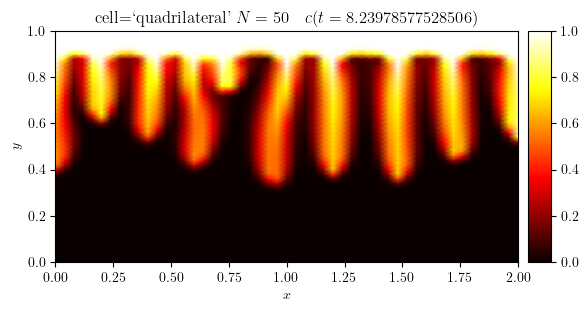

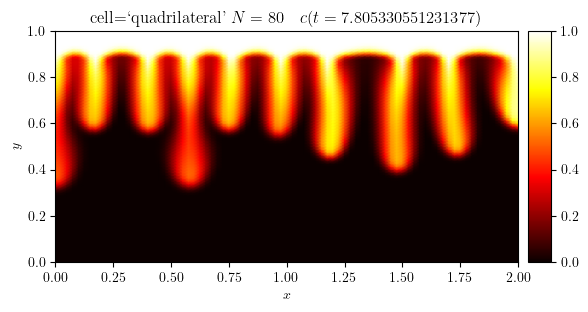

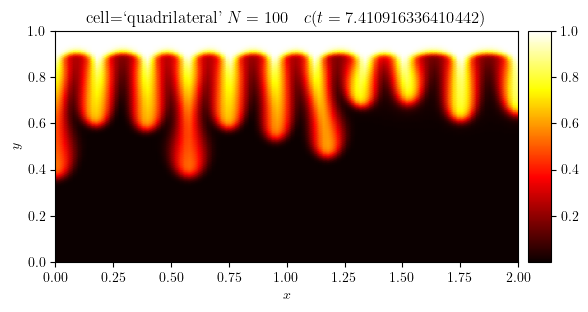

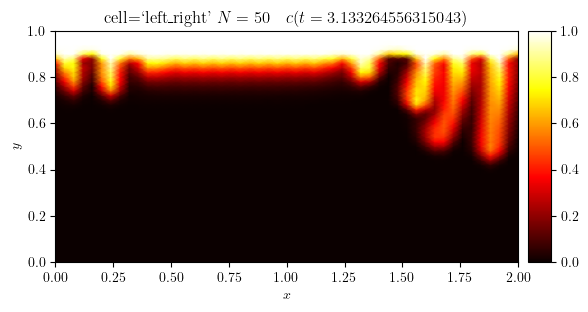

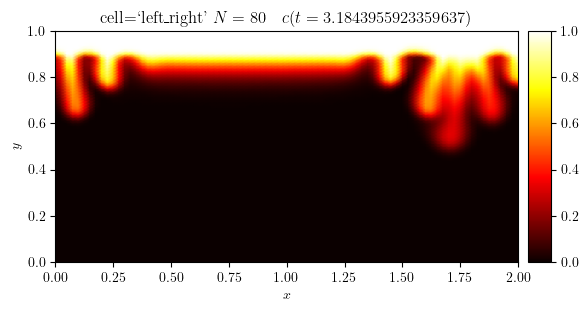

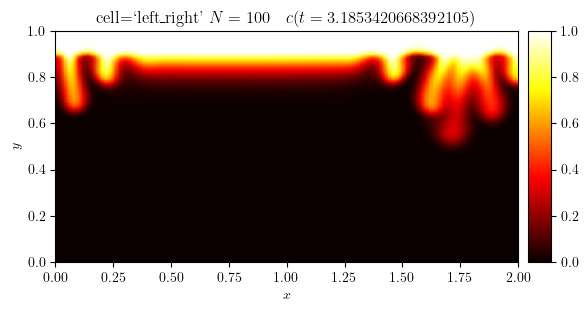

In [3]:
for c in cell:
    plot_colormap_comparison(
        [v['c'] for k, v in simulation.items() if k[0] == c],
        t=-1,
        labels=[f"cell=`{c}' $N={n}$" for n in N_cell],
    )